In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1
Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling



In [5]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
df.duplicated().any()

True

In [10]:
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

<Axes: ylabel='Count'>

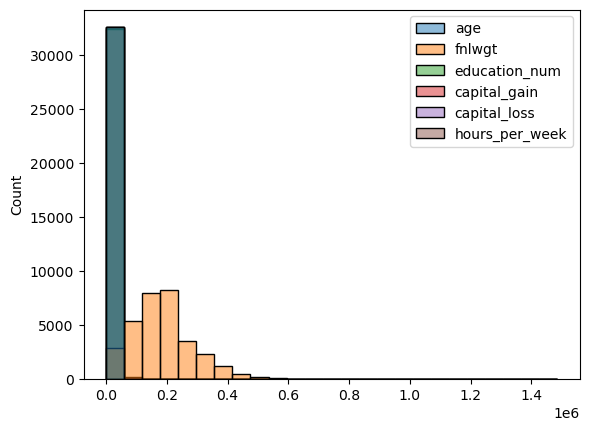

In [11]:
sns.histplot(df,bins=25)

## Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder

In [13]:
std_scaler = StandardScaler()

In [14]:
df['std_scaler_age'] = std_scaler.fit_transform(df[['age']])
df['std_scaler_fnlwgt'] = std_scaler.fit_transform(df[['fnlwgt']])
df['std_scaler_education_num'] = std_scaler.fit_transform(df[['education_num']])
df['std_scaler_capital_gain'] = std_scaler.fit_transform(df[['capital_gain']])
df['std_scaler_capital_loss'] = std_scaler.fit_transform(df[['capital_loss']])
df['std_scaler_hours_per_week'] = std_scaler.fit_transform(df[['hours_per_week']])

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,income,std_scaler_age,std_scaler_fnlwgt,std_scaler_education_num,std_scaler_capital_gain,std_scaler_capital_loss,std_scaler_hours_per_week
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664


<Axes: ylabel='Count'>

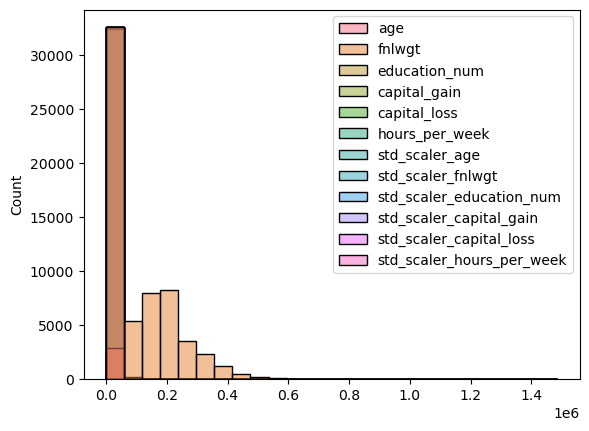

In [16]:
sns.histplot(df,bins=25)

## MinMax Scaler

In [17]:
min_scaler = MinMaxScaler()

In [18]:
df['min_scaler_age'] = min_scaler.fit_transform(df[['age']])
df['min_scaler_fnlwgt'] = min_scaler.fit_transform(df[['fnlwgt']])
df['min_scaler_education_num'] = min_scaler.fit_transform(df[['education_num']])
df['min_scaler_capital_gain'] = min_scaler.fit_transform(df[['capital_gain']])
df['min_scaler_capital_loss'] = min_scaler.fit_transform(df[['capital_loss']])
df['min_scaler_hours_per_week'] = min_scaler.fit_transform(df[['hours_per_week']])

<Axes: ylabel='Count'>

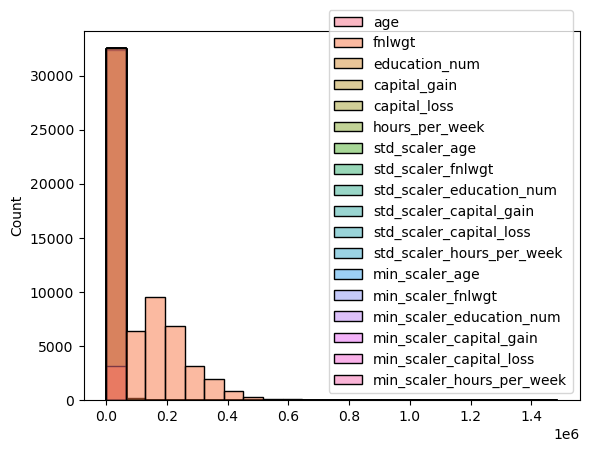

In [19]:
sns.histplot(df,bins=23)

## 2.
Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.



In [20]:
one_hot = OneHotEncoder()

In [21]:
df_new = pd.DataFrame(one_hot.fit_transform(df[['sex']]).toarray())

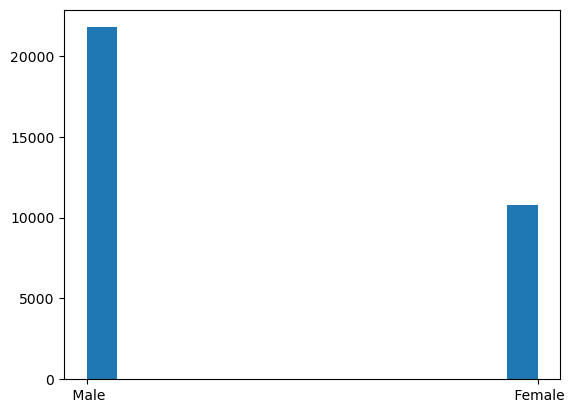

In [22]:
plt.hist(df['sex'], bins=15)
plt.show()

### Label Encoder

In [23]:
lab_enc = LabelEncoder()

In [51]:
df['workclass'] = lab_enc.fit_transform(df['workclass'])
df['education'] = lab_enc.fit_transform(df['education'])
df['marital_status'] = lab_enc.fit_transform(df['marital_status'])
df['occupation'] = lab_enc.fit_transform(df['occupation'])
df['relationship'] = lab_enc.fit_transform(df['relationship'])
df['race'] = lab_enc.fit_transform(df['race'])
df['sex'] = lab_enc.fit_transform(df['sex'])
df['native_country'] = lab_enc.fit_transform(df['native_country'])
df['income'] = lab_enc.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,std_scaler_hours_per_week,min_scaler_age,min_scaler_fnlwgt,min_scaler_education_num,min_scaler_capital_gain,min_scaler_capital_loss,min_scaler_hours_per_week,n_age,Hours_per_week_bin,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,1,...,-0.035664,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,medium,7.684784
1,50,6,83311,9,13,2,4,0,4,1,...,-2.222483,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,low,0.000000
2,38,4,215646,11,9,0,6,1,4,1,...,-0.035664,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,medium,0.000000
3,53,4,234721,1,7,2,6,0,2,1,...,-0.035664,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1,medium,0.000000
4,28,4,338409,9,13,2,10,5,2,0,...,-0.035664,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,medium,0.000000


<Axes: ylabel='Count'>

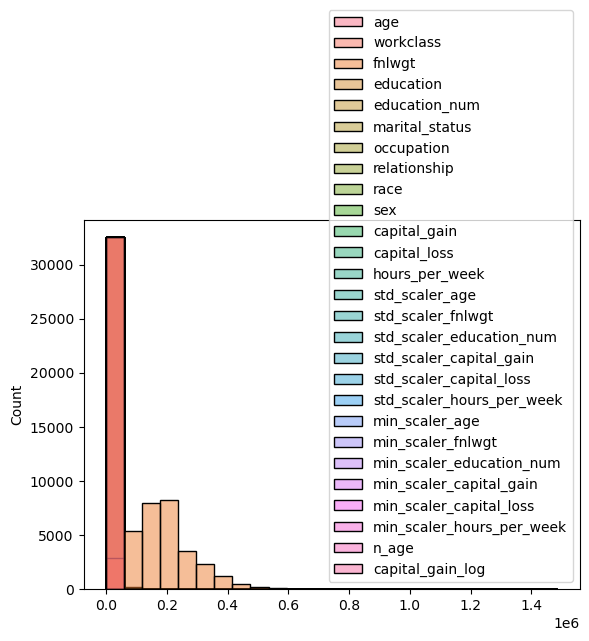

In [38]:
sns.histplot(df,bins=25)

## 3. 
Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [55]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,std_scaler_hours_per_week,min_scaler_age,min_scaler_fnlwgt,min_scaler_education_num,min_scaler_capital_gain,min_scaler_capital_loss,min_scaler_hours_per_week,n_age,Hours_per_week_bin,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,1,...,-0.035664,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,"(33.667, 66.333]",7.684784
1,50,6,83311,9,13,2,4,0,4,1,...,-2.222483,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,"(0.902, 33.667]",0.000000
2,38,4,215646,11,9,0,6,1,4,1,...,-0.035664,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,"(33.667, 66.333]",0.000000
3,53,4,234721,1,7,2,6,0,2,1,...,-0.035664,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1,"(33.667, 66.333]",0.000000
4,28,4,338409,9,13,2,10,5,2,0,...,-0.035664,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,"(33.667, 66.333]",0.000000


## 4. 
Feature Selection:

•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [41]:
from sklearn.ensemble import IsolationForest

In [42]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [43]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df[numerical_features])
df_no_outliers = df[outliers != -1]
df_no_outliers.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,std_scaler_hours_per_week,min_scaler_age,min_scaler_fnlwgt,min_scaler_education_num,min_scaler_capital_gain,min_scaler_capital_loss,min_scaler_hours_per_week,n_age,Hours_per_week_bin,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,1,...,-0.035664,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,medium,7.684784
1,50,6,83311,9,13,2,4,0,4,1,...,-2.222483,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,low,0.000000
2,38,4,215646,11,9,0,6,1,4,1,...,-0.035664,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,medium,0.000000
3,53,4,234721,1,7,2,6,0,2,1,...,-0.035664,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1,medium,0.000000
4,28,4,338409,9,13,2,10,5,2,0,...,-0.035664,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,medium,0.000000


### Outliers can skew model training by creating noise, leading to poor performance and generalization

In [44]:
import ppscore as pps

In [57]:
pps_matrix = pps.matrix(df)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.739200,0.886143,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75736.243800,77225.235712,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.719600,2.728949,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.865200,1.906863,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
895,capital_gain_log,min_scaler_capital_loss,0.000000,regression,True,mean absolute error,0.018528,0.035304,DecisionTreeRegressor()
896,capital_gain_log,min_scaler_hours_per_week,0.000000,regression,True,mean absolute error,0.076031,0.077745,DecisionTreeRegressor()
897,capital_gain_log,n_age,0.000000,regression,True,mean absolute error,0.190200,0.299793,DecisionTreeRegressor()
898,capital_gain_log,Hours_per_week_bin,0.025177,classification,True,weighted F1,0.704482,0.711922,DecisionTreeClassifier()


In [46]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

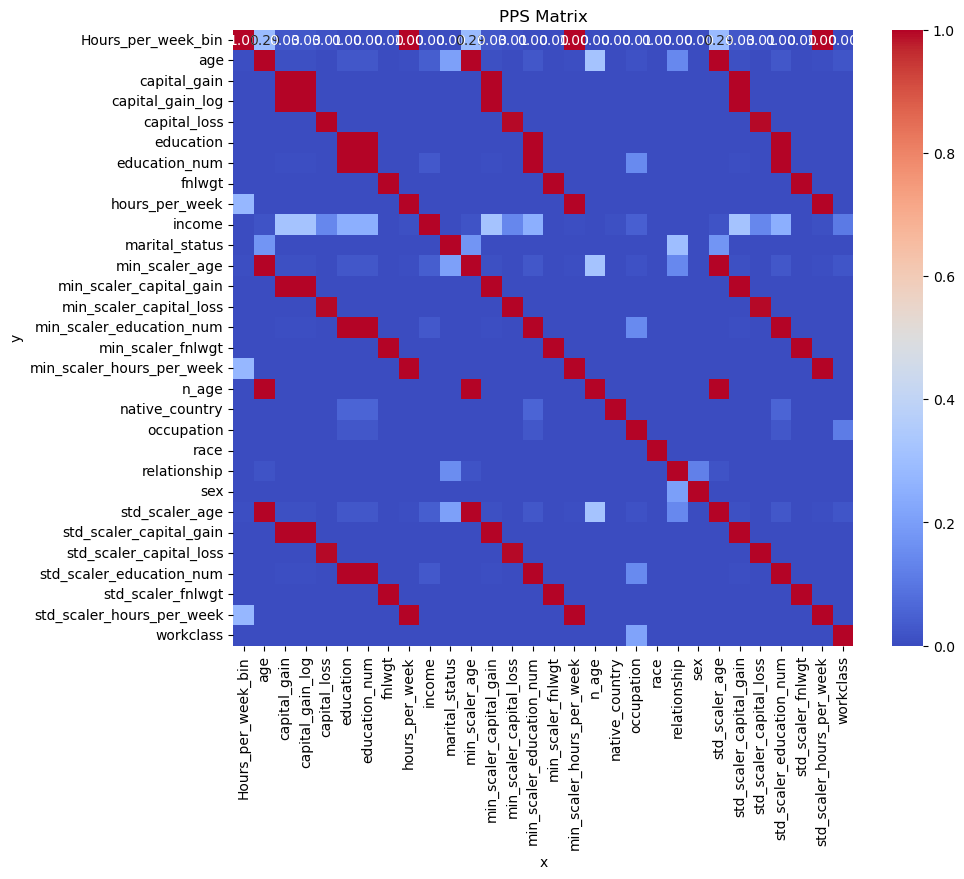

In [47]:
plot_heatmap(pps_matrix.pivot(columns='x', index='y', values='ppscore'), 'PPS Matrix')